# Group 8

# Assignement 1 {-}

---

*Each group member has contributed 25%*
# Problem 1

# Part (a)
Here we will solve the classical harmonic oscillator equation with three different numerical methods to solve ODEs, namely Euler's , Leapfrog, RK2.

The differential equation for harmonic oscillator is
$$ \frac{d^2x}{dt^2} = -\frac{k}{m}x = -\omega^2 x $$
with $m=1 $ unit and $k=1$ unit, intial conditions $x(0) =x_0$ and $x'(0)=v(0)=v_0$. 
We can solve this numerically by breaking SHM equation into two first order ODEs as follows
\begin{align*}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= -\omega^2 x
\end{align*} 
with  $$ \tau = \frac{1}{\omega}$$ as timescale of problem.

In [6]:
import numpy as np, matplotlib.pyplot as plt
# from scipy.stats import linregress

First we define the solvers.

In [4]:
# Solvers
def euler(t_i, t_f, y0,v0,step,diffeqn):
    '''
    t_i = time domain starting point,
    t_f = time domain final point,
    y0  = inital value of y (postion),
    v0 = initial value of v (velocity),
    step = step size for time discreetization, 
    diffeqn = the differential equation we wanna solve.
    '''
    N = int((t_f-t_i)/step) # no of steps

    # create empty arrays to store data
    t = np.zeros(N)
    y = np.zeros(N)
    v = np.zeros(N)

    # intial values of postion and velocity
    y[0] = y0
    v[0] = v0
    t[0] = t_i

    # Euler method
    for i in range(N-1):
        v[i+1] = v[i] + diffeqn(y[i])*step
        y[i+1] = y[i] + v[i]*step
        t[i+1] = t[i] + step
    
    return t,y,v,N

def rk2(t_i, t_f, y0,v0,step,dvdt):
    '''
    t_i = time domain starting point,
    t_f = time domain final point,
    y0  = inital value of y (postion),
    v0 = initial value of v (velocity),
    step = step size for time discreetization, 
    diffeqn = the differential equation we wanna solve.
    '''
    N = int((t_f-t_i)/step) # no of steps

    # create empty arrays to store data
    t = np.zeros(N)
    y = np.zeros(N)
    v = np.zeros(N)

    # intial values of postion and velocity
    y[0] = y0
    v[0] = v0
    t[0] = t_i

    # RK2 method
    for i in range(N-1):
        # update velocity
        
        k1 = step*dvdt(y[i])
        l1 = step*v[i]
    
        k2 = step*dvdt(y[i]+ l1/2)
        l2 = step*(v[i] + k1/2)
        
        v[i+1] = v[i] + k2
        y[i+1] = y[i] + l2
        
        t[i+1] = t[i] + step
    
    return t,y,v,N

def leapfrog(t_i, t_f, y0,v0,step,diffeqn):
    '''
    t_i = time domain starting point,
    t_f = time domain final point,
    y0  = inital value of y (postion),
    v0 = initial value of v (velocity),
    step = step size for time discreetization, 
    diffeqn = the differential equation we wanna solve.
    '''
    N = int((t_f-t_i)/step) # no of steps

    # create empty arrays to store data
    t = np.zeros(N)
    y = np.zeros(N)
    v = np.zeros(N)

    # intial values of postion and velocity
    y[0] = y0
    v[0] = v0
    t[0] = t_i

    # Euler method
    for i in range(N-1):
        y_half = y[i] + v[i]*step/2
        v[i+1] = v[i] + diffeqn(y_half)*step
        y[i+1] = y_half + v[i+1]*step/2
        t[i+1] = t[i] + step
    
    return t,y,v,N

def rk4(t_i, t_f, y0,v0,step,dvdt):
    '''
    t_i = time domain starting point,
    t_f = time domain final point,
    y0  = inital value of y (postion),
    v0 = initial value of v (velocity),
    step = step size for time discreetization, 
    diffeqn = the differential equation we wanna solve.
    '''
    N = int((t_f-t_i)/step) # no of steps

    # create empty arrays to store data
    t = np.zeros(N)
    y = np.zeros(N)
    v = np.zeros(N)

    # intial values of postion and velocity
    y[0] = y0
    v[0] = v0
    t[0] = t_i

    # RK2 method
    for i in range(N-1):
        # update velocity
        
        k1 = step*dvdt(y[i])
        l1 = step*v[i]
    
        k2 = step*dvdt(y[i]+ l1/2)
        l2 = step*(v[i] + k1/2)

        k3 = step*dvdt(y[i] + l2/2)
        l3 = step*(v[i] + k2/2)

        k4 = step*dvdt(y[i] + l3)
        l4 = step*(v[i] + k3)

        v[i+1] = v[i] + k1/6 + k2/3 + k3/3 + k4/6
        y[i+1] = y[i] + l1/6 + l2/3 + l3/3 + l4/6
        
        t[i+1] = t[i] + step
    
    return t,y,v,N


Now we will find the position as a function of time and plot it as well as phase space trajectory for two differnet initial conditions.
$$ x(0)=x_{0} = 1.0 ~,~ v(0)= v_0 = 0.0 $$ 
$$ x(0)=x_{01} = 1.5 ~,~ v(0)= v_0 = 0.0 $$ 

step size:  0.1


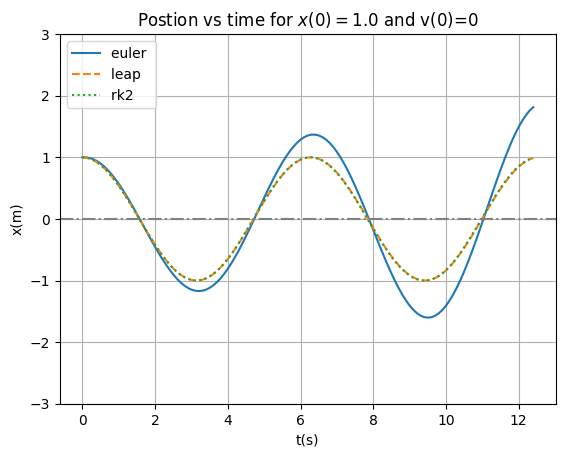

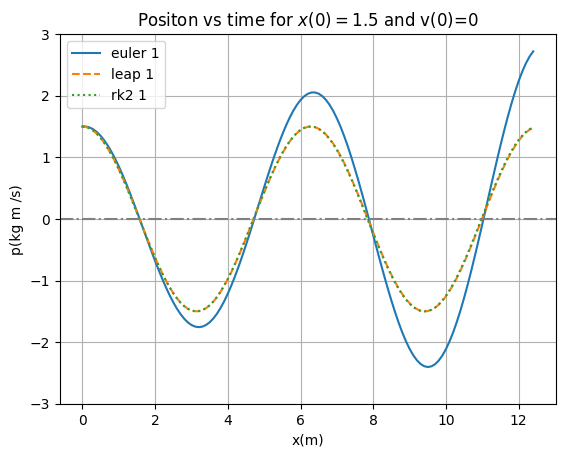

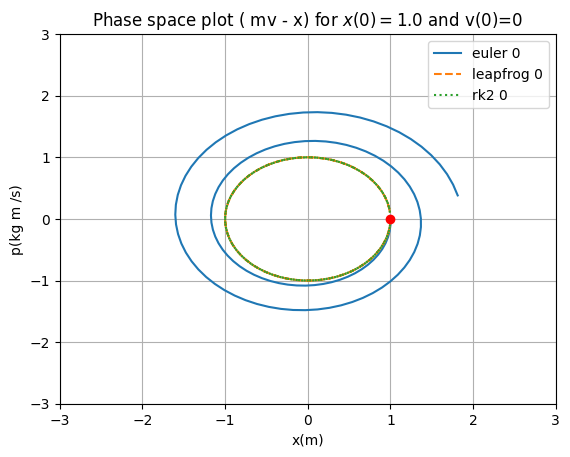

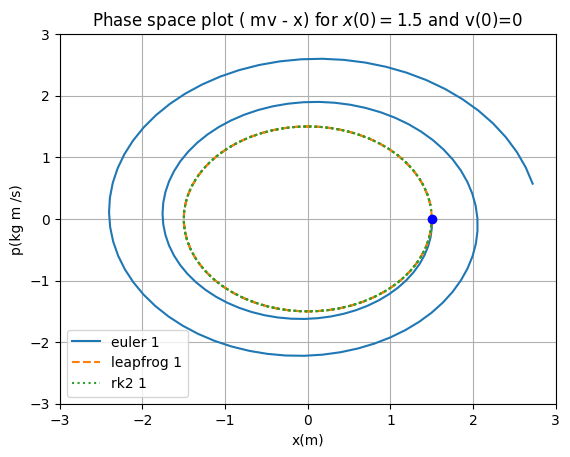

In [14]:
# system constants
k = 1  # spring constant
m = 1  # mass 

# First inital condtions
x0 = 1.0 
v0 = 0.0

# Second initial conditon
x01 = 1.5 # initial positon
v01 = v0 # initial velocity


omega = np.sqrt(k/m)  # natural frequency of system
tau = 1/omega # time scale of the problem = 1/omega

# We have taken this particular step size to reproduce plots shown in Wang's book.
dt  = tau/10 # grid size
T = 4*np.pi*tau # domain size

print('step size: ', dt)

# Differntial equation of SHM
def dvdt(x):
    return -(omega**2)*x


# for first initial condition--------------------------------------------

# Call the defined solvers to solve the IVP
t,x_euler,v_euler,N_euler = euler(0.0, T , x0 ,v0 , dt, dvdt)
t,x_leap, v_leap, N_leap  = leapfrog(0.0, T , x0 ,v0 , dt, dvdt)
t,x_rk2,  v_rk2,  N_rk2   = rk2(0.0, T , x0 ,v0 , dt, dvdt)

# Energy calculations, m=1 ,k=1
E_true = 0.5*x0**2 + 0.5*v0**2
E_euler= 0.5*x_euler**2 + 0.5*v_euler**2
E_leap = 0.5*x_leap**2 + 0.5*v_leap**2
E_rk2  = 0.5*x_rk2**2 + 0.5*v_rk2**2

# relative errors 
err_euler = np.abs(0.5*x_euler**2 + 0.5*v_euler**2 - E_true)/E_true
err_leap  = np.abs(0.5*x_leap**2 + 0.5*v_leap**2   - E_true)/E_true
err_rk2   = np.abs(0.5*x_rk2**2 + 0.5*v_rk2**2     - E_true)/E_true

# For second initial condition-------------------------------------------------

t,x1_euler,v1_euler,N1_euler = euler(0.0, T , x01 ,v01 , dt, dvdt)
t,x1_leap,v1_leap,N1_leap = leapfrog(0.0, T , x01 ,v01 , dt, dvdt)
t,x1_rk2,v1_rk2,N1_rk2 = rk2(0.0, T , x01 ,v01 , dt, dvdt)

# Energy calculations, m=1 ,k=1
E1_true = 0.5*x01**2 + 0.5*v01**2
E1_euler= 0.5*x1_euler**2 + 0.5*v1_euler**2
E1_leap = 0.5*x1_leap**2 + 0.5*v1_leap**2
E1_rk2 = 0.5*x1_rk2**2 + 0.5*v1_rk2**2

# relative errors
err1_euler = np.abs(0.5*x1_euler**2 + 0.5*v1_euler**2 - E1_true)/E1_true
err1_leap  = np.abs(0.5*x1_leap**2  + 0.5*v1_leap**2  - E1_true)/E1_true
err1_rk2   = np.abs(0.5*x1_rk2**2   + 0.5*v1_rk2**2   - E1_true)/E1_true


plt.figure()
plt.title('Postion vs time for $x(0)=1.0$ and v(0)=0')
plt.xlabel('t(s)')
plt.ylabel('x(m)')
plt.plot(t,x_euler,ls='-',label='euler ')
plt.plot(t,x_leap,ls='--',label='leap ')
plt.plot(t,x_rk2,ls=':',label='rk2 ')
plt.grid()
plt.axhline(0,0,1,ls='-.', color='grey')
plt.ylim(-3,3)
plt.legend()

plt.figure(2)
plt.title('Positon vs time for $x(0)=1.5$ and v(0)=0')
plt.xlabel('x(m)')
plt.ylabel('p(kg m /s)')
plt.plot(t,x1_euler,ls='-',label='euler 1')
plt.plot(t,x1_leap,ls='--',label='leap 1')
plt.plot(t,x1_rk2,ls=':',label='rk2 1')
plt.axhline(0,0,1,ls='-.', color='grey')
plt.legend()
plt.ylim(-3,3)
plt.grid('true')

plt.figure(3)
plt.title('Phase space plot ( mv - x) for $x(0)=1.0$ and v(0)=0')
plt.xlabel('x(m)')
plt.ylabel('p(kg m /s)')
plt.plot(x_euler,v_euler,ls='-',label='euler 0')
plt.plot(x_leap,v_leap,ls='--',label='leapfrog 0')
plt.plot(x_rk2,v_rk2,ls=':',label='rk2 0')
plt.plot(x_rk2[0],v_rk2[0],'ro')
plt.legend()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid('true')

plt.figure(4)
plt.title('Phase space plot ( mv - x) for $x(0)=1.5$ and v(0)=0')
plt.xlabel('x(m)')
plt.ylabel('p(kg m /s)')
plt.plot(x1_euler,v1_euler,ls='-',label='euler 1')
plt.plot(x1_leap,v1_leap,ls='--',label='leapfrog 1')
plt.plot(x1_rk2,v1_rk2,ls=':',label='rk2 1')
plt.plot(x1_rk2[0],v1_rk2[0],'bo')
plt.legend()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid('true')


---
# Part (b) Relative Energy Error Plots

The energy of the oscillator is a constant $$E_{true} = \frac{1}{2}kx^2 + \frac{1}{2}mv^2 = 0.5 \cdot x(0)^2 + 0.5 \cdot v(0)^2$$
The relative error is defined as $$\epsilon = \frac{|E_{num} - E_{true}|}{E_{true}}$$  where $E_{num}$ is the numerical estimate of energy.
We will evalue this and plot its logarithm with time.

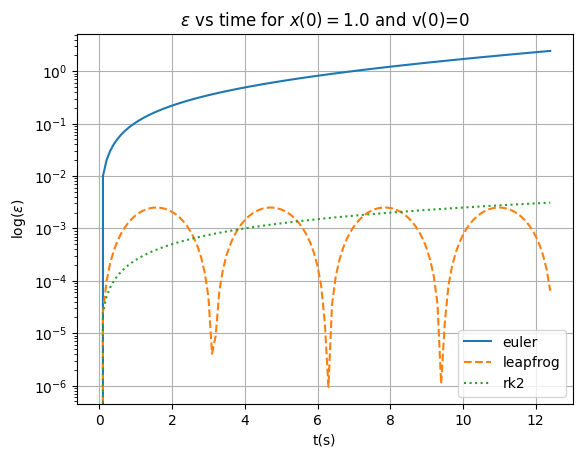

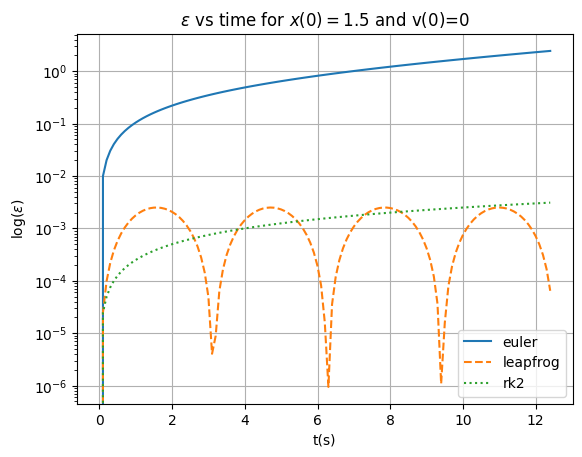

In [15]:
# The calculations for energy are kept in previous cell to avoid variable overwriting errors. Here we just plot them.
plt.figure()
plt.title('$\epsilon$ vs time for $x(0)=1.0$ and v(0)=0')
plt.xlabel('t(s)')
plt.ylabel('log($\epsilon$)')
plt.semilogy(t,err_euler,ls='-',label='euler')
plt.semilogy(t,err_leap,ls='--',label='leapfrog')
plt.semilogy(t,err_rk2,ls=':',label='rk2')
plt.grid('True')
plt.legend()

plt.figure()
plt.title('$\epsilon$ vs time for $x(0)=1.5$ and v(0)=0')
plt.xlabel('t(s)')
plt.ylabel('log($\epsilon$)')
plt.semilogy(t,err1_euler,ls='-',label='euler')
plt.semilogy(t,err1_leap,ls='--',label='leapfrog')
plt.semilogy(t,err1_rk2,ls=':',label='rk2')
plt.grid('True')
plt.legend()

**Observation**
We see that relative energy errors are independent of intial conditons to good accuarcy. For instance

In [8]:
print('Inital energy 1:', E_euler[0],',', 'Initial Energy 2: ',E1_euler[0])
# print(E_euler[-1],E1_euler[-1])
print('Relative Error final steps for first intial conditions using euler method: ', err_euler[-1])
print('Relative Error final steps for second intial conditions using euler method: ', err1_euler[-1])

Inital energy 1: 0.5 , Initial Energy 2:  1.125
Relative Error final steps for first intial conditions using euler method:  2.4343958370448044
Relative Error final steps for second intial conditions using euler method:  2.4343958370448013


---
## Part (c) Reducing step size

We will plot relative energy errors with step size hlaved and compare it with intial step size.

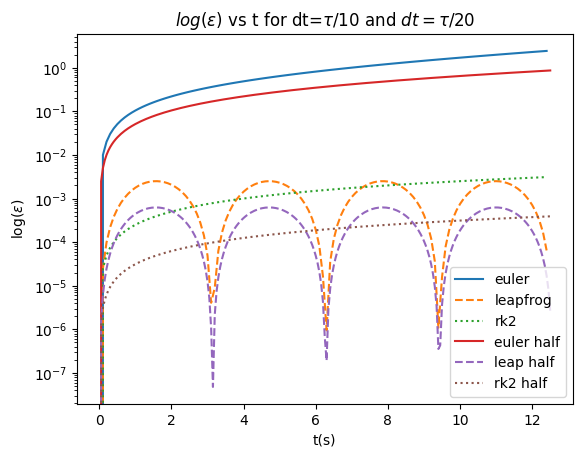

In [16]:
# for first  inital condition

# with step size halved 
dt2  = dt/2 # grid size

# Compurte solution with new step size
t2,x2_euler,v2_euler,N2_euler = euler(0.0, T , x0 ,v0 , dt2, dvdt)
t2,x2_leap,v2_leap,N2_leap = leapfrog(0.0, T , x0 ,v0 , dt2, dvdt)
t2,x2_rk2,v2_rk2,N2_rk2 = rk2(0.0, T , x0 ,v0 , dt2, dvdt)


# Relative errors
err2_euler = np.abs(0.5*x2_euler**2 + 0.5*v2_euler**2 - E_true)/E_true
err2_leap  = np.abs(0.5*x2_leap**2 + 0.5*v2_leap**2   - E_true)/E_true
err2_rk2   = np.abs(0.5*x2_rk2**2 + 0.5*v2_rk2**2     - E_true)/E_true


plt.figure()
plt.title('$log(\epsilon$) vs t for dt=$\\tau /10$ and $dt =  \\tau /20$')
plt.ylabel('log($\epsilon$)')
plt.xlabel('t(s)')
plt.semilogy(t,err_euler,ls='-',label='euler')
plt.semilogy(t,err_leap,ls='--',label='leapfrog')
plt.semilogy(t,err_rk2,ls=':',label='rk2')
plt.semilogy(t2,err2_euler,ls='-',label='euler half')
plt.semilogy(t2,err2_leap,ls='--',label='leap half')
plt.semilogy(t2,err2_rk2,ls=':',label='rk2 half')
plt.legend()


plt.show()


**Observation**
Since RK2 is highest order global error in each step here $ \mathcal{O}(\Delta t^2)$ so it shows largest decrease in reltive error with reduction of step size.

---
## Part (d)  RK4

Here we will redo Part(b) the above calcuations with RK4

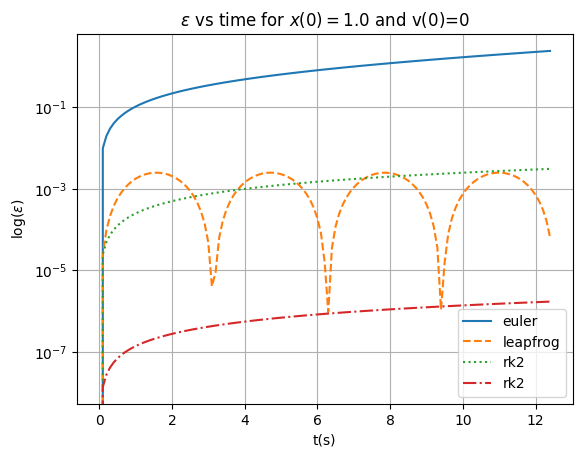

In [19]:
# Compute postion and velocity using RK4
t,x_rk4,v_rk4,N_rk4 = rk4(0.0, T , x0 ,v0 , dt, dvdt)

# Energy calculations, m=1 ,k=1
E_rk4 = 0.5*x_rk4**2 + 0.5*v_rk4**2

# relative errors
err_rk4   = np.abs(0.5*x_rk4**2 + 0.5*v_rk4**2     - E_true)/E_true

#plots
plt.figure()
plt.title('$\epsilon$ vs time for $x(0)=1.0$ and v(0)=0')
plt.xlabel('t(s)')
plt.ylabel('log($\epsilon$)')
plt.semilogy(t,err_euler,ls='-',label='euler')
plt.semilogy(t,err_leap,ls='--',label='leapfrog')
plt.semilogy(t,err_rk2,ls=':',label='rk2')
plt.semilogy(t,err_rk4,ls='-.',label='rk2')
plt.grid('True')
plt.legend()
plt.show()

**Observations** \
The RK4 being the highest order method ( global error of $\mathcal O (\Delta t^4))$ has least error. The relative error in energy will be very for several tens of cycles but it is increasing. Whereas for leapfrog, $log(\epsilon)$ seems to have upper bound.

---
---

*Each group member has contributed 25%*
# Problem 2

In this problem we will solve the coupled system of equation 
$$\frac{dH}{dt} = -\lambda_Z Z$$
$$\frac{dZ}{dt} = -\lambda_H H$$

# Part (a)
**Solution:**  Since we are only asked to take side, we choose to be on the Zombie side!

---
# Part (b)

Since we took Zombie's side we will solve the differnetial eqation with intial conditions:
$$H=69 ~,~ Z = 100 , ~ \lambda_H = 2.0 ~,~ \lambda_Z = 1.0$$

In this cell we define vectorised RK2 

In [1]:
# Solver 
def rk2(t_i, t_f, X0,step,dXdt):
    '''
    t_i = time domain starting point,
    t_f = time domain final point,
    X0 = 1x2 array containin inital values
    step = step size for time discreetization, 
    dXdt = the vector differential equation we wanna solve.
    '''
    N = int((t_f-t_i)/step) # no of steps

    # create empty arrays to store data
    t = np.zeros(N)
    X = np.zeros((2,N))

    # intial values of dependent varibales
    X[0,0] = X0[0]
    X[1,0] = X0[1]
    t[0] = t_i

    # RK2 method
    for i in range(N-1):
        # update velocity
        
        k1 = step*dXdt(X[0,i],X[1,i])

        k2 = step*dXdt(X[0,i]+ k1[0]/2,X[1,i]+ k1[1]/2)
    
        
        X[0,i+1] = X[0,i] + k2[0]
        X[1,i+1] = X[1,i] + k2[1]
        
        t[i+1] = t[i] + step
    
    return t,X,N


Then we define our differentila equation:

In [3]:
# Differential Equation
def dXdt(H,Z):
    lZ = 1.0
    lH = 2.0
    return np.array([-lZ*Z,-lH*H])


Finally we solve

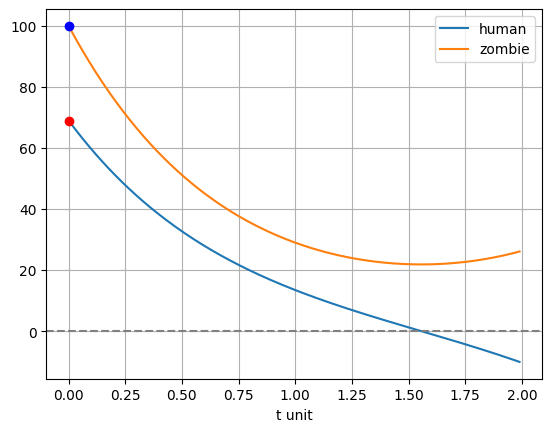

In [11]:

# Initial Conditions
H0 = 69
Z0 = 100

# time domian
ti  =  0.0
tf = 2.0

dt = 0.01 #step size
X0 = np.array([H0,Z0])
t , X ,N = rk2(ti,tf,X0,dt,dXdt)

plt.xlabel('t unit')
plt.plot(t,X[0],label='human')
plt.plot(t[0],X[0][0],'ro')
plt.plot(t,X[1],label='zombie')
plt.plot(t[0],X[1][0],'bo')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.legend()
plt.grid()

**Zombies win.** The larger intial number took over the slower kill rate so Zombies won.

---
# Part (c)


Now we solve with inital conditions 
$$H=70 ~,~ Z = 99 , ~ \lambda_H = 2.0 ~,~ \lambda_Z = 1.0$$

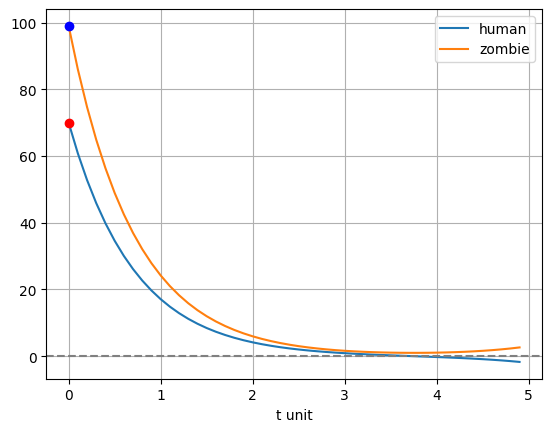

In [20]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 70
Z0 = 99


# simulate for 10 second
ti  =  0.0
tf = 5.0
dt = 0.1
X0 = np.array([H0,Z0])
t , X ,N = rk2(ti,tf,X0,dt,dXdt)

plt.plot(t,X[0],label='human')
plt.plot(t[0],X[0][0],'ro')
plt.plot(t,X[1],label='zombie')
plt.plot(t[0],X[1][0],'bo')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.xlabel('t unit')
plt.legend()
plt.grid()

**Zombies win again.**

---
# Part (d) 
In this part we plot $H(t)$ for differnt values of $H(0)$ and find the ciritical value $Z_c$ such that if $Z>Z_c$ humans lose.

## H(0) = 80

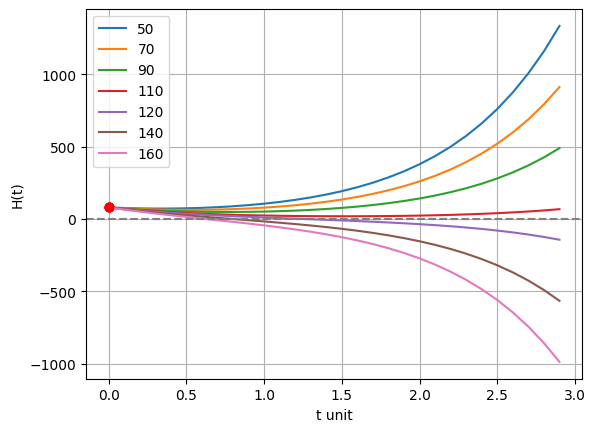

In [23]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 80
Z0_array = np.array([50,70,90,110,120,140,160])

# simulate for 10 second
ti  =  0.0
tf = 3.0
dt = 0.1


for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label=str(Z0))
    plt.plot(t[0],X[0][0],'ro')
    
plt.ylabel('H(t)')
plt.xlabel('t unit')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.grid() 
plt.legend()

We see that critical value of Z lies somewhere between 110 to 120. So we check for all of these values.

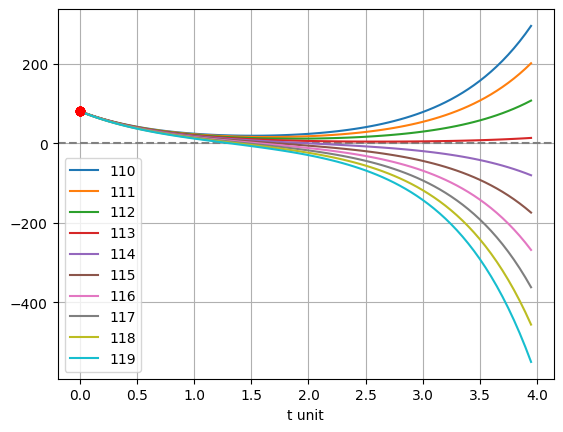

In [22]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 80
Z0_array = np.arange(110,120,1)

# simulate for 10 second
ti  =  0.0
tf = 4.0
dt = 0.05

plt.axhline(0,0,tf,ls='--',color='grey')
for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label=str(Z0))
    plt.plot(t[0],X[0][0],'ro')

plt.xlabel('t unit')
plt.legend()
plt.grid()

So we see that for Z = 114 zombies win and Z = 113 Humans win. So $Z_c = 113$. 

---
## H(0) = 100

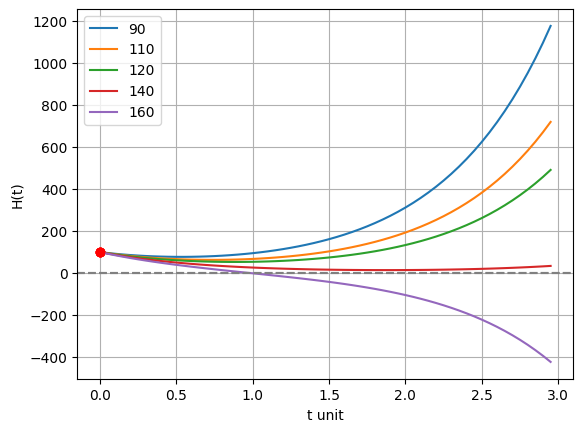

In [24]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 100
Z0_array = np.array([90,110,120,140,160])

# simulation time
ti  =  0.0
tf = 3.0
dt = 0.05

plt.axhline(0,0,tf,ls='--',color='grey')
for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label=str(Z0))
    plt.plot(t[0],X[0][0],'ro')

plt.ylabel('H(t)')
plt.xlabel('t unit')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.grid() 
plt.legend()

Wee see that critical value lies somewhere between $160<Z_c<140$

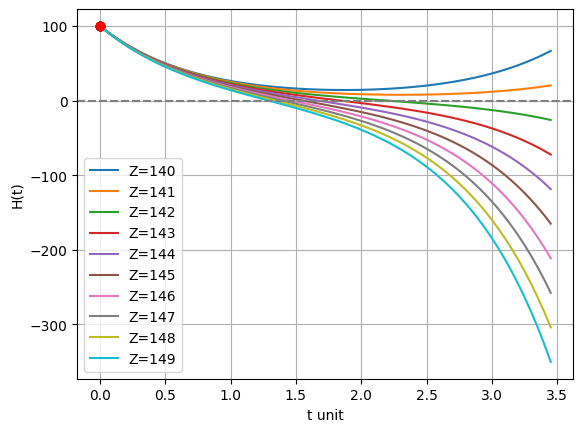

In [25]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 100
Z0_array = np.arange(140,150,1)

# simulate for 10 second
ti  =  0.0
tf = 3.5
dt = 0.05

plt.axhline(0,0,tf,ls='--',color='grey')
for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label='Z='+str(Z0))
    plt.plot(t[0],X[0][0],'ro')

plt.ylabel('H(t)')
plt.xlabel('t unit')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.grid() 
plt.legend()

So we see that for Z = 142 zombies win and Z = 141 Humans win. So $Z_c = 141$. 

---
## H(0)=120

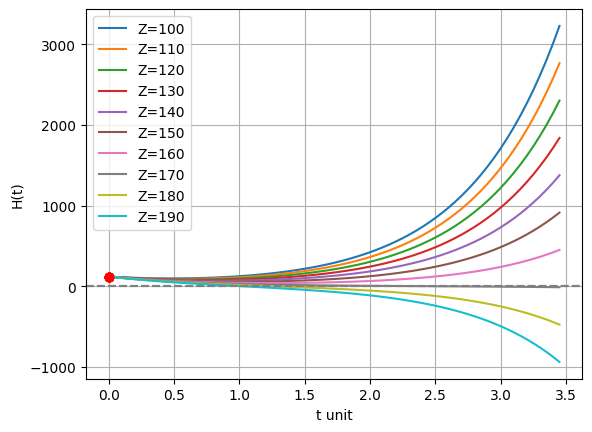

In [27]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 120
Z0_array = np.arange(100,200,10)

# simulate for 10 second
ti  =  0.0
tf = 3.5
dt = 0.05

plt.axhline(0,0,tf,ls='--',color='grey')
for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label='Z='+str(Z0))
    plt.plot(t[0],X[0][0],'ro')

plt.ylabel('H(t)')
plt.xlabel('t unit')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.grid() 
plt.legend()

We zoom in over Z between 160 to 180.

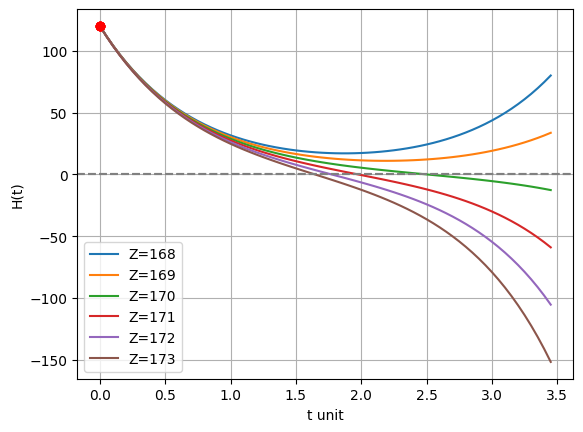

In [30]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 120
Z0_array = np.arange(168,174,1)

# simulate for 10 second
ti  =  0.0
tf = 3.5
dt = 0.05

plt.axhline(0,0,tf,ls='--',color='grey')
for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label='Z='+str(Z0))
    plt.plot(t[0],X[0][0],'ro')

plt.ylabel('H(t)')
plt.xlabel('t unit')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.grid() 
plt.legend()

So we see that for Z = 170 zombies win and Z = 169 Humans win. So $Z_c = 169$. 

---
## H(0)=140

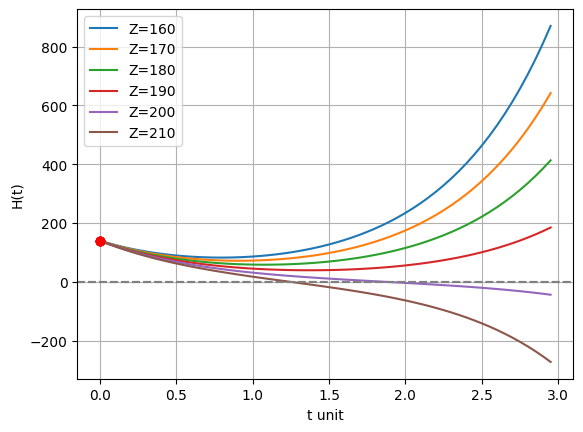

In [31]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 140
Z0_array = np.arange(160,220,10)

# time domian
ti  =  0.0
tf = 3.0
dt = 0.05

plt.axhline(0,0,tf,ls='--',color='grey')
for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label='Z='+str(Z0))
    plt.plot(t[0],X[0][0],'ro')



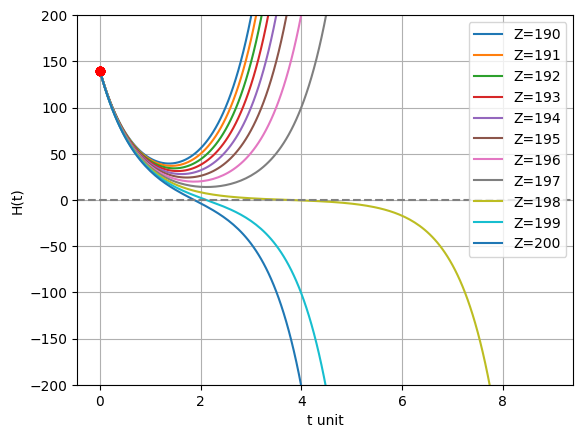

In [32]:
# Initial Conditions
lH = 2.0
lZ = 1.0
H0 = 140
Z0_array = np.arange(190,201,1)

# time domian
ti  =  0.0
tf = 9
dt = 0.05


plt.ylim(-200,200)
for i in range(len(Z0_array)):
    Z0 = Z0_array[i]
    X0 = np.array([H0,Z0])
    t , X ,N = rk2(ti,tf,X0,dt,dXdt)

    plt.plot(t,X[0],label='Z='+str(Z0))
    plt.plot(t[0],X[0][0],'ro')

plt.ylabel('H(t)')
plt.xlabel('t unit')
plt.axhline(0,0,tf,ls='--',color='grey')
plt.grid() 
plt.legend()

So we see that for Z = 198 zombies win and Z = 197 Humans win. So $Z_c = 197$. 

## Finding scaling constant

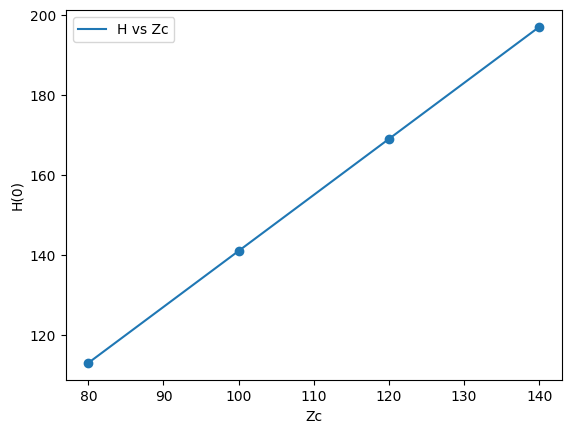

In [35]:
H1, Z1 = 80,113
H2, Z2 = 100,141
H3, Z3 = 120,169
H4, Z4 = 140,197
Hc = np.array([H1,H2,H3,H4])
Zc = np.array([Z1,Z2,Z3,Z4])

plt.ylabel('H(0)')
plt.xlabel('Zc')
plt.plot(Hc,Zc,label='H vs Zc')
plt.scatter(Hc,Zc)
plt.legend()

In [36]:
ratio = Hc/Zc
print(ratio)

[0.7079646  0.70921986 0.71005917 0.7106599 ]


We see that for all intial values of H $$\frac{H}{Z_c} > \frac{1}{\sqrt{2}}$$ is true. Further for $Z_c + 1$ humans lose and $$\frac{H}{1+ Z_c} < \frac{1}{\sqrt{2}}$$ 
So $Z_c$ is defined as the largest integer for which $$\frac{H}{Z_c} > \frac{1}{\sqrt{2}} = \sqrt{\frac{\lambda_Z}{\lambda_H}}$$ as we will see anayltically below.

We also note that $$\frac{H}{Z_c} \neq \frac{1}{\sqrt{2}}$$ for both $H$ and $Z_C$ should be integers. 

---
## Analytical soltuion

We can decouple these differential equations by differntiating any of the eqation and substituing other into it. Doing this we get  $$ \frac{d^2H}{dt^2} = \lambda_H \lambda_Z H $$ whose solutions are
$$ H(t)= A\exp(\sqrt{\lambda_H \lambda_Z}t) + B \exp(-\sqrt{\lambda_H \lambda_Z}t) $$ 
$$ Z(t)= -\sqrt{\frac{\lambda_H}{\lambda_Z}} \left( A\exp(\sqrt{\lambda_H \lambda_Z}t) - B \exp(-\sqrt{\lambda_H \lambda_Z}t) \right) $$


$$A = \frac{H(0)-Z(0)  \sqrt{\lambda_z / \lambda_H}}{2}$$
$$B = \frac{H(0) +Z(0)  \sqrt{\lambda_z / \lambda_H}}{2}$$

And if we see that if $$\frac{H(0)}{Z(0)} = \sqrt{\frac{\lambda_Z}{\lambda_H}}$$ then $A = 0$ and
$$ H(t) = B \exp(-\sqrt{\lambda_H \lambda_Z}t)$$ 
$$ Z(t) =\sqrt{\frac{\lambda_H}{\lambda_Z}} B \exp(-\sqrt{\lambda_H \lambda_Z}t)$$ 

And both of them can never be zero at any time $t_0$.

And if $$\frac{H(0)}{Z(0)} > \sqrt{\frac{\lambda_Z}{\lambda_H}}$$ then
$$ A = \frac{Z(0)}{2} \left(  \frac{H(0)}{Z(0)} -  \sqrt{\lambda_z / \lambda_H} \right) > 0$$

and $B>0$ already. Since both coeffiecients $e$ in $H(t)$ are **greater than zero** means $H(t) > 0 ~ \forall ~ t$ and Human always wins!